In [5]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside notebook
%matplotlib inline

# Better plot size
plt.rcParams['figure.figsize'] = (10, 5)

# 📥 Load dataset
df = pd.read_csv("/Users/priya/Downloads/vgsales_medium.csv")

# 👀 Preview data
df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.14,6.50,2.02
1,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
2,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
3,Wii Play,Wii,2006,Misc,Nintendo,14.02,9.20,2.93,1.04
4,Pokemon Red/Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


In [6]:
# Check info and missing values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Ensure correct datatypes
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)

# Drop any rows with missing Year or Sales (if any)
df = df.dropna()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         200 non-null    object 
 1   Platform     200 non-null    object 
 2   Year         200 non-null    int64  
 3   Genre        200 non-null    object 
 4   Publisher    200 non-null    object 
 5   NA_Sales     200 non-null    float64
 6   EU_Sales     200 non-null    float64
 7   JP_Sales     200 non-null    float64
 8   Other_Sales  200 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 14.2+ KB
None

Missing values per column:
 Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.14,6.50,2.02
1,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
2,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
3,Wii Play,Wii,2006,Misc,Nintendo,14.02,9.20,2.93,1.04
4,Pokemon Red/Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


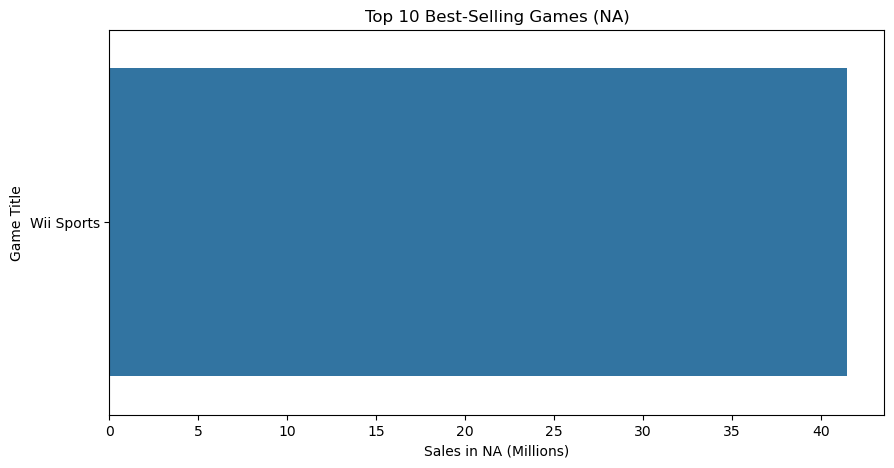

In [7]:
top10 = df.sort_values(by="NA_Sales", ascending=False).head(10)

sns.barplot(data=top10, x="NA_Sales", y="Name")
plt.title("Top 10 Best-Selling Games (NA)")
plt.xlabel("Sales in NA (Millions)")
plt.ylabel("Game Title")
plt.show()


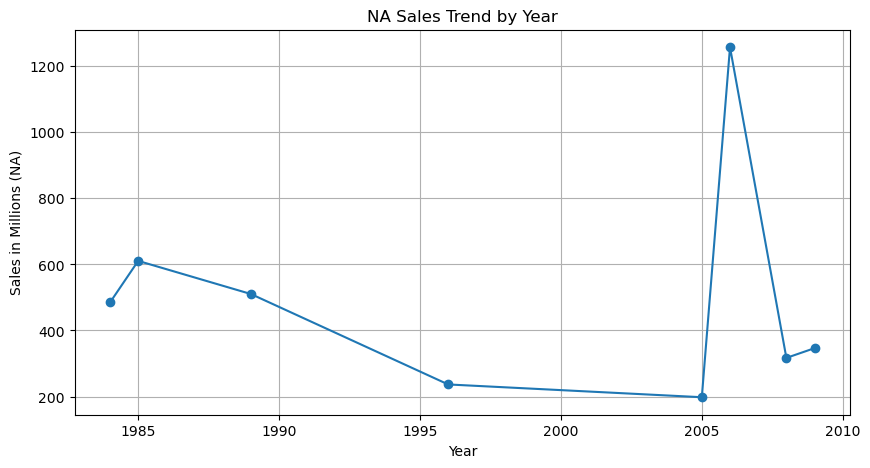

In [8]:
sales_by_year = df.groupby("Year")["NA_Sales"].sum()

plt.plot(sales_by_year.index, sales_by_year.values, marker='o')
plt.title("NA Sales Trend by Year")
plt.xlabel("Year")
plt.ylabel("Sales in Millions (NA)")
plt.grid(True)
plt.show()


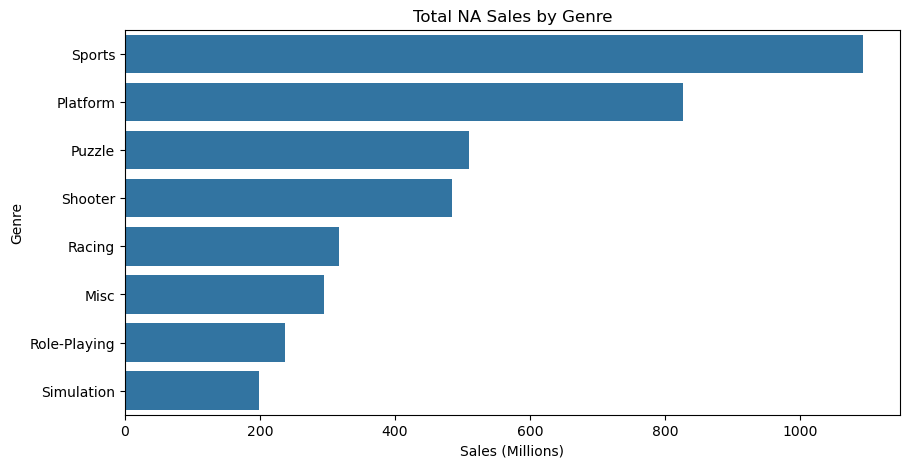

In [9]:
genre_sales = df.groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False)

sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title("Total NA Sales by Genre")
plt.xlabel("Sales (Millions)")
plt.ylabel("Genre")
plt.show()


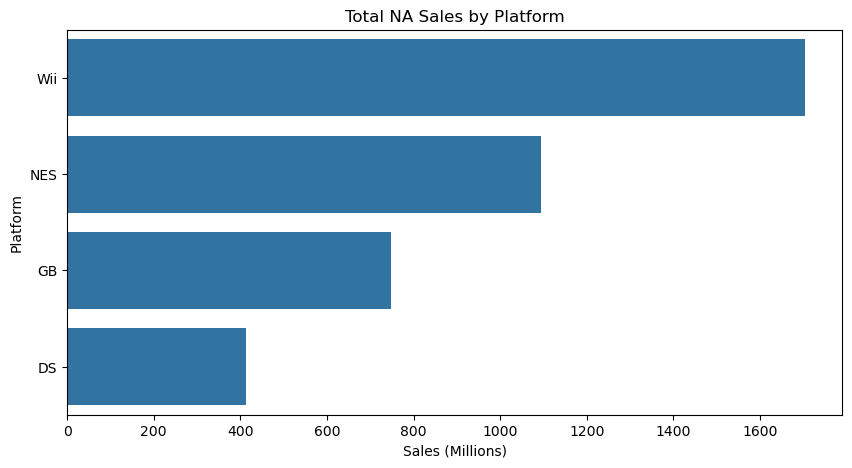

In [10]:
platform_sales = df.groupby("Platform")["NA_Sales"].sum().sort_values(ascending=False)

sns.barplot(x=platform_sales.values, y=platform_sales.index)
plt.title("Total NA Sales by Platform")
plt.xlabel("Sales (Millions)")
plt.ylabel("Platform")
plt.show()


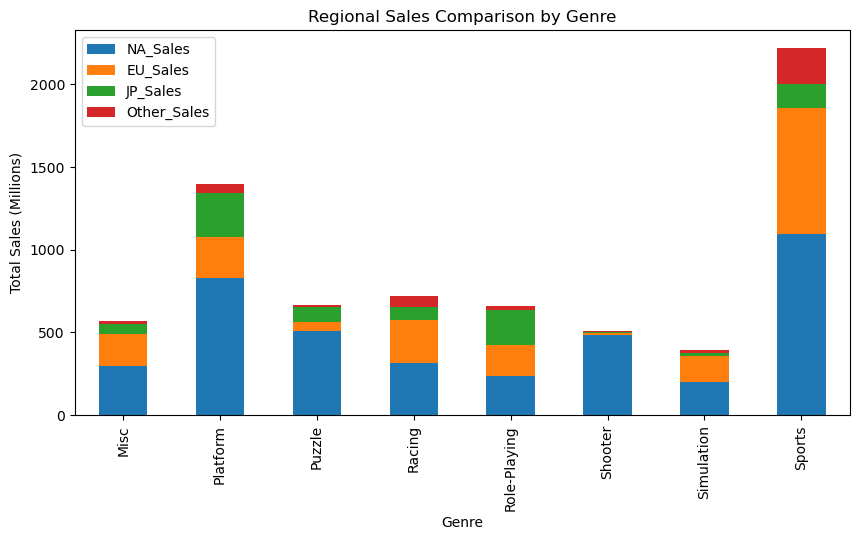

In [11]:
region_compare = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

region_compare.plot(kind="bar", stacked=True)
plt.title("Regional Sales Comparison by Genre")
plt.ylabel("Total Sales (Millions)")
plt.xlabel("Genre")
plt.show()
